**Submitted By,** <br> 
Name: Anshara Chowdhury <br>
ID: 2021768 <br>
Name: Fahim Shahriar Eram <br>
ID: 2022523

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pandas.plotting import parallel_coordinates
import plotly.express as px

In [2]:
df = pd.read_csv("iris.data", header=None)
df

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
df.rename(columns = {0:'Sepal-Length', 1:'Sepal-Width', 2:'Petal-Length', 3:'Petal-Width', 4:'Class'}, inplace = True)
df


,Sepal-Length,Sepal-Width,Petal-Length,Petal-Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
new_df = df.drop(columns=["Petal-Width"])
new_df

,Sepal-Length,Sepal-Width,Petal-Length,Class
0,5.1,3.5,1.4,Iris-setosa
1,4.9,3.0,1.4,Iris-setosa
2,4.7,3.2,1.3,Iris-setosa
3,4.6,3.1,1.5,Iris-setosa
4,5.0,3.6,1.4,Iris-setosa
...,...,...,...,...
145,6.7,3.0,5.2,Iris-virginica
146,6.3,2.5,5.0,Iris-virginica
147,6.5,3.0,5.2,Iris-virginica
148,6.2,3.4,5.4,Iris-virginica


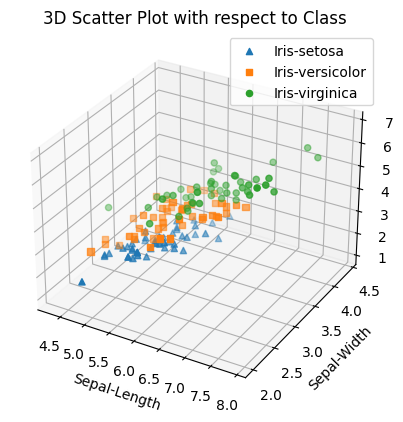

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
classes = new_df['Class'].unique()
marker_shapes = ['^', 's', 'o']

for i, class_type in enumerate(classes):
    class_data = new_df[new_df['Class'] == class_type]
    ax.scatter(class_data['Sepal-Length'], class_data['Sepal-Width'], class_data['Petal-Length'], marker=marker_shapes[i], label=class_type)

ax.set_xlabel('Sepal-Length')
ax.set_ylabel('Sepal-Width')
ax.set_zlabel('Petal-Length')
ax.set_title('3D Scatter Plot with respect to Class')
ax.legend()
plt.show()

                 Sepal-Length  Sepal-Width  Petal-Length
Class                                                   
Iris-setosa             5.006        3.418         1.464
Iris-versicolor         5.936        2.770         4.260
Iris-virginica          6.588        2.974         5.552


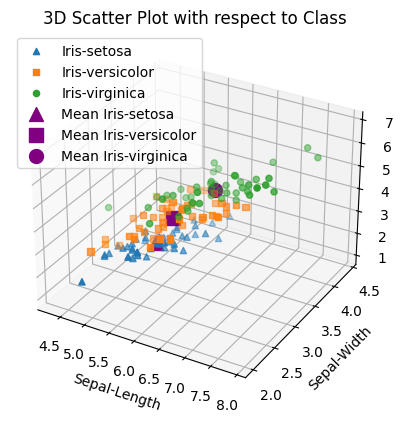

In [6]:
mean_data = new_df.groupby('Class').mean()
print(mean_data)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
classes = new_df['Class'].unique()
marker_shapes = ['^', 's', 'o']

for i, class_type in enumerate(classes):
    class_data = new_df[new_df['Class'] == class_type]
    ax.scatter(class_data['Sepal-Length'], class_data['Sepal-Width'], class_data['Petal-Length'], marker=marker_shapes[i], label=class_type)

for i, class_type in enumerate(mean_data.index):
    mean_point = mean_data.loc[class_type]
    ax.scatter(mean_point['Sepal-Length'], mean_point['Sepal-Width'], mean_point['Petal-Length'], marker=marker_shapes[i], c='purple', s=100, label=f'Mean {class_type}')

ax.set_xlabel('Sepal-Length')
ax.set_ylabel('Sepal-Width')
ax.set_zlabel('Petal-Length')
ax.set_title('3D Scatter Plot with respect to Class')
ax.legend()
plt.show()

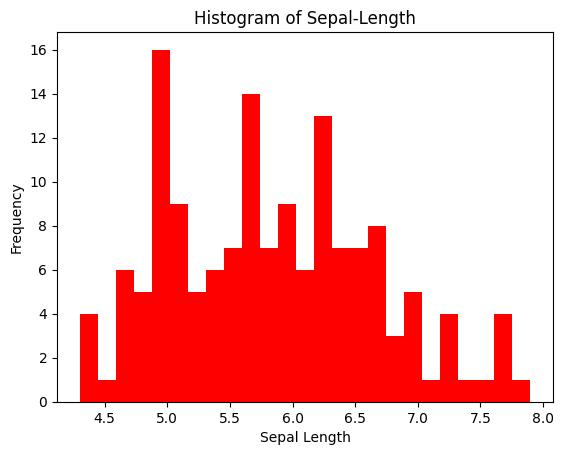

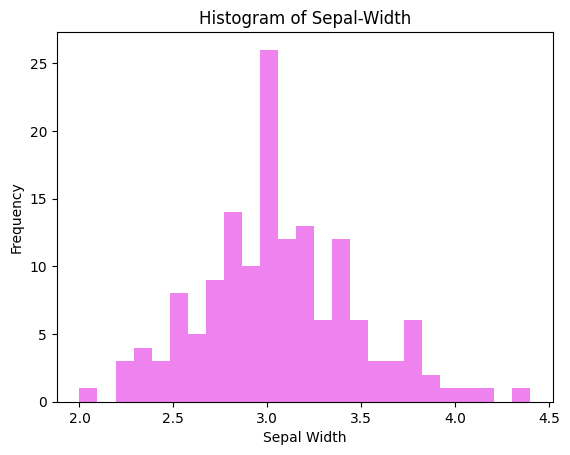

In [7]:
plt.hist(new_df['Sepal-Length'], bins=25, color="red")
plt.xlabel('Sepal Length')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal-Length')
plt.show()

plt.hist(new_df['Sepal-Width'], bins=25, color="violet")
plt.xlabel('Sepal Width')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal-Width')
plt.show()

In [8]:
print("Standard Deviation of Sepal Length:", new_df['Sepal-Length'].std())
print("Standard Deviation of Sepal Width:", new_df['Sepal-Width'].std())

Standard Deviation of Sepal Length: 0.828066127977863
Standard Deviation of Sepal Width: 0.4335943113621737


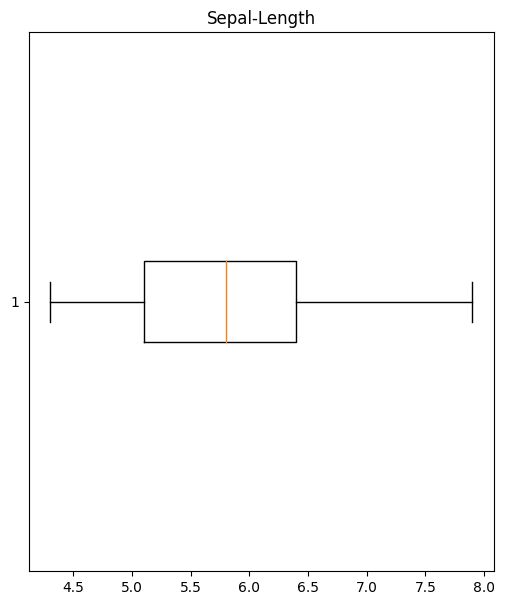

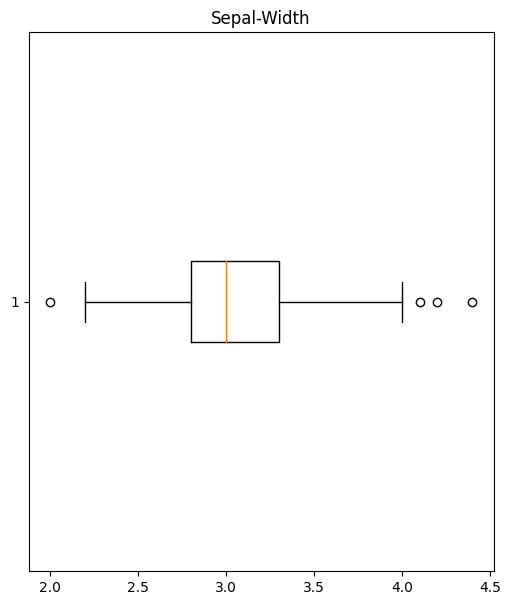

In [9]:
plt.figure(figsize =(6, 7))
plt.boxplot(new_df['Sepal-Length'], vert = 0)
plt.title("Sepal-Length")
plt.show()

plt.figure(figsize =(6, 7))
plt.boxplot(new_df['Sepal-Width'], vert = 0)
plt.title("Sepal-Width")
plt.show()

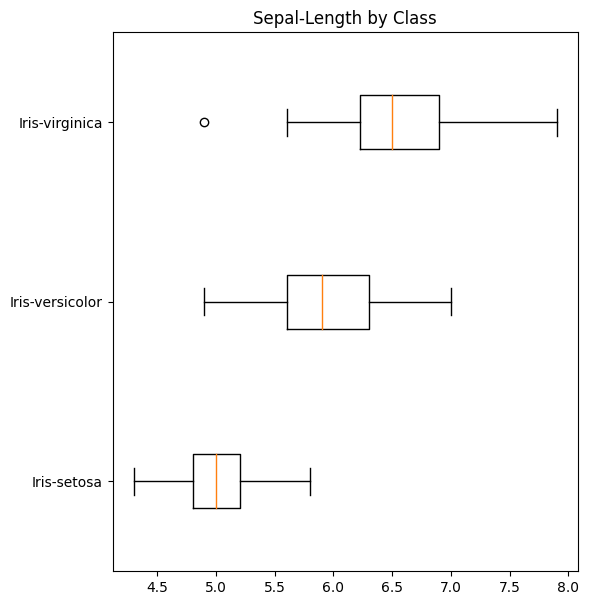

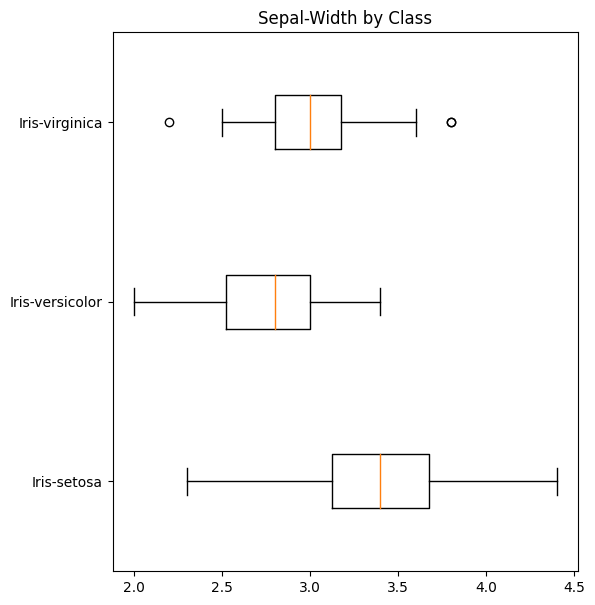

In [10]:
plt.figure(figsize=(6, 7))
boxplot_data_length = new_df.groupby('Class')['Sepal-Length'].apply(list)
labels_length = new_df['Class'].unique()
plt.boxplot(boxplot_data_length, vert=0)
plt.title("Sepal-Length by Class")
plt.yticks(range(1, len(labels_length) + 1), labels_length)
plt.show()

plt.figure(figsize=(6, 7))
boxplot_data_width = new_df.groupby('Class')['Sepal-Width'].apply(list)
labels_width = new_df['Class'].unique()
plt.boxplot(boxplot_data_width, vert=0)
plt.title("Sepal-Width by Class")
plt.yticks(range(1, len(labels_width) + 1), labels_width)
plt.show()

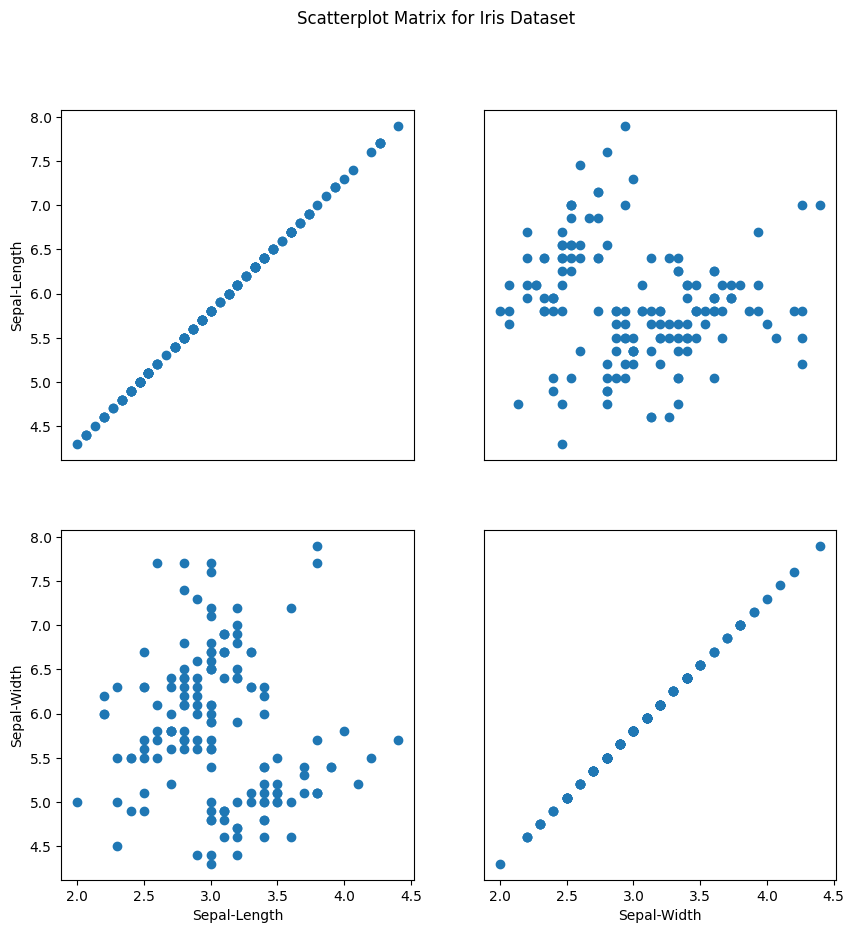

In [11]:
columns = ['Sepal-Length', 'Sepal-Width']
fig, axes = plt.subplots(len(columns), len(columns), figsize=(10, 10))

for i, column_x in enumerate(columns):
    for j, column_y in enumerate(columns):
        ax = axes[i, j]
        if i == j:
            ax.scatter(new_df[column_x], new_df[column_x])
            ax.set_ylabel(column_x)
            ax.set_xlabel(column_x) 
        else:
            if (i==1 and j==0):
              ax.set_ylabel(column_x)
              ax.set_xlabel(column_y)
            ax.scatter(new_df[column_x], new_df[column_y])
        if j > 0:
            ax.yaxis.set_visible(False)
        if i < len(columns) - 1:
            ax.xaxis.set_visible(False)

fig.suptitle("Scatterplot Matrix for Iris Dataset")
plt.show()

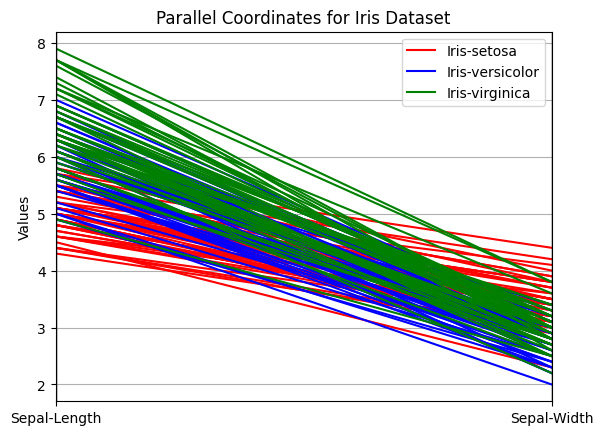


Previously calculated mean and standard deviation
Mean Sepal-Length: 5.843333333333334
Mean Sepal-Width: 3.0540000000000003
Standard Deviation of Sepal Length: 0.828066127977863
Standard Deviation of Sepal Width: 0.4335943113621737

From visual observation
Mean Sepal-Length: 6.1
Mean Sepal-Length: 3.2
Standard Deviation of Sepal Length: 0.8642916174532764
Standard Deviation of Sepal Width: 0.45614325235244546


In [12]:
data = new_df[['Sepal-Length', 'Sepal-Width', 'Class']]
parallel_coordinates(data, 'Class', color=('red', 'blue', 'green'))
plt.ylabel('Values')
plt.title('Parallel Coordinates for Iris Dataset')
plt.show()

print()
print("Previously calculated mean and standard deviation")
print("Mean Sepal-Length:", new_df['Sepal-Length'].mean())
print("Mean Sepal-Width:", new_df['Sepal-Width'].mean())
print("Standard Deviation of Sepal Length:", new_df['Sepal-Length'].std())
print("Standard Deviation of Sepal Width:", new_df['Sepal-Width'].std())
print()
print("From visual observation")
print("Mean Sepal-Length:",  (new_df['Sepal-Length'].min()+new_df['Sepal-Length'].max())/2)
print("Mean Sepal-Length:",  (new_df['Sepal-Width'].min()+new_df['Sepal-Width'].max())/2)

data1 = new_df['Sepal-Length']
mean1 = (new_df['Sepal-Length'].min()+new_df['Sepal-Length'].max())/2
squared_diffs1 = []
for x in data1:
    diff = x - mean1
    squared_diff = diff ** 2
    squared_diffs1.append(squared_diff)
sum_squared_diffs = sum(squared_diffs1)
variance = sum_squared_diffs / len(data)
std_dev1 = variance ** 0.5

data2 = new_df['Sepal-Width']
mean2 = (new_df['Sepal-Width'].min()+new_df['Sepal-Width'].max())/2
squared_diffs2 = []
for x in data2:
    diff = x - mean2
    squared_diff = diff ** 2
    squared_diffs2.append(squared_diff)
sum_squared_diffs = sum(squared_diffs2)
variance = sum_squared_diffs / len(data)
std_dev2 = variance ** 0.5

print("Standard Deviation of Sepal Length:", std_dev1)
print("Standard Deviation of Sepal Width:", std_dev2)